In [1]:
import os
import shutil
import pandas as pd

# Base path to your dataset
base_path = r"E:\Research\dev\Copra_Grading_Research\Copra_grading_data"

# Read all three CSV files
train_df = pd.read_csv(os.path.join(base_path, 'train', '_annotations.csv'))
valid_df = pd.read_csv(os.path.join(base_path, 'valid', '_annotations.csv'))
test_df = pd.read_csv(os.path.join(base_path, 'test', '_annotations.csv'))

# Display information about each set
print("Training set:")
print(train_df['class'].value_counts())
print("\nValidation set:")
print(valid_df['class'].value_counts())
print("\nTest set:")
print(test_df['class'].value_counts())

# Display sample rows
print("\nSample data from training set:")
print(train_df.head())

Training set:
class
Copra_Grade_B    300
Copra_Grade_A    296
Copra_Grade_C    282
Name: count, dtype: int64

Validation set:
class
Copra_Grade_A    91
Copra_Grade_B    85
Copra_Grade_C    74
Name: count, dtype: int64

Test set:
class
Copra_Grade_C    50
Copra_Grade_B    40
Copra_Grade_A    36
Name: count, dtype: int64

Sample data from training set:
                                            filename          class
0  B20230924152834_jpg.rf.fe61aa07ea9be942541e84e...  Copra_Grade_B
1  C20230924165334_jpg.rf.ff68058b42bbb8ac1924aed...  Copra_Grade_C
2  B20230924160616_jpg.rf.fee176fc0f41557b947d5b9...  Copra_Grade_B
3  A20230924140146_jpg.rf.ff53b02e9476397a10cca71...  Copra_Grade_A
4  A20230924135928_jpg.rf.b6f28edf0185811b87a5ac3...  Copra_Grade_A


In [51]:
pip install tensorflow numpy pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [4]:
# Base dataset path
base_path = r"E:\Research\dev\Copra_Grading_Research\Copra_grading_data"

# Hyperparameters
batch_size = 32
image_size = (224, 224)  # Resize all images to 224x224
epochs = 15  # Number of training epochs


In [5]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data generator (no augmentation)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_data = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)

valid_data = valid_test_datagen.flow_from_directory(
    os.path.join(base_path, 'valid'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = valid_test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)


Found 878 images belonging to 3 classes.
Found 250 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


In [6]:
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(train_data.num_classes, activation='softmax')  # Output layer
])

model.summary()


C:\Users\ASUS VIVOBOOK\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epochs,
    batch_size=batch_size
)

C:\Users\ASUS VIVOBOOK\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 947ms/step - accuracy: 0.3369 - loss: 1.7934

C:\Users\ASUS VIVOBOOK\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3367 - loss: 1.7783 - val_accuracy: 0.4280 - val_loss: 1.0667
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 825ms/step - accuracy: 0.4507 - loss: 1.0234 - val_accuracy: 0.6800 - val_loss: 0.7273
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 824ms/step - accuracy: 0.6797 - loss: 0.7365 - val_accuracy: 0.7160 - val_loss: 0.5921
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 23s 830ms/step - accuracy: 0.6778 - loss: 0.6546 - val_accuracy: 0.7120 - val_loss: 0.5731
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 841ms/step - accuracy: 0.7414 - loss: 0.5891 - val_accuracy: 0.7480 - val_loss: 0.5717
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 842ms/step - accuracy: 0.7174 - loss: 0.6000 - val_accuracy: 0.6400 - val_loss: 0.6382
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 852ms/step - accuracy: 0.7572 - loss: 0.5560 - val_accuracy: 0.7880 - val_loss: 0.4773
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 856ms/step - accuracy: 0.7981 - loss: 0.5194 - val_accuracy: 0.8080 -

In [15]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


C:\Users\ASUS VIVOBOOK\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step - accuracy: 0.8430 - loss: 0.3701
Test Accuracy: 88.10%


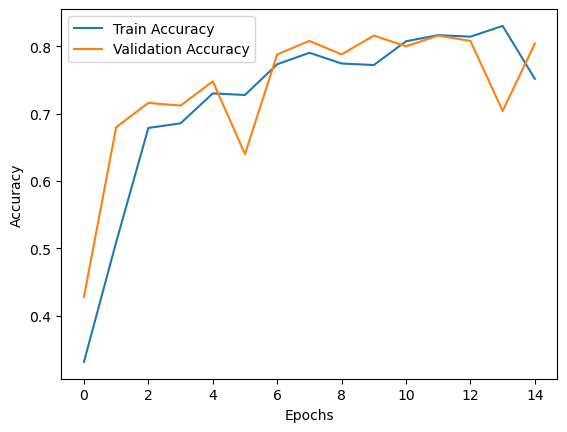

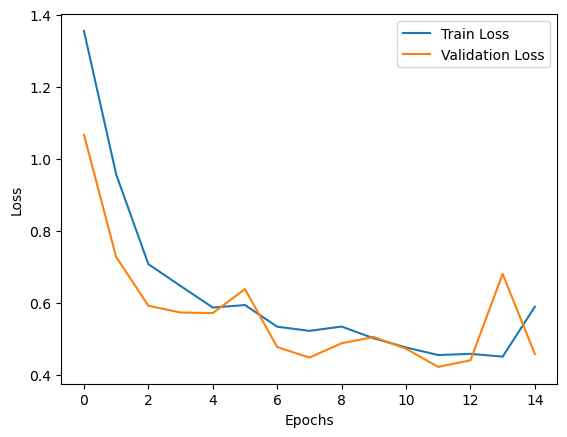

In [19]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
model.save("copra_grading_model1.keras")

In [23]:
# Load the model
loaded_model = tf.keras.models.load_model("copra_grading_model1.keras")

# Test on new data (use test_data or single image)
test_loss, test_accuracy = loaded_model.evaluate(test_data)
print(f"Test Accuracy with loaded model: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.8430 - loss: 0.3701
Test Accuracy with loaded model: 88.10%


In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the new image
new_image_path = r"E:\Research\dev\Copra_Grading_Research\Copra_grading_data\test_image1.jpg"  # Change to your test image path

# Load the image and preprocess it
IMG_SIZE = (150, 150)  # Ensure this matches the size used during training
image = load_img(new_image_path, target_size=IMG_SIZE)  # Load and resize the image
image_array = img_to_array(image)  # Convert to a NumPy array
image_array = image_array / 255.0  # Normalize pixel values
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension